In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [2]:
df = pd.read_csv('marketing_campaign.csv', sep="\t")

In [3]:
df.head()

,customer,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,5,0,0,0,0,0,0,3,11,0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   customer             2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

### There are missing values in the income column. There aren't many so I will drop them a little further down. ###

In [5]:
df.shape

(2240, 29)

In [6]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
customer,2240.0,5592.159821,3246.662198,0.0,2828.25,5458.5,8427.75,11191.0
Year_Birth,2240.0,1968.805804,11.984069,1893.0,1959.00,1970.0,1977.00,1996.0
Income,2216.0,52247.251354,25173.076661,1730.0,35303.00,51381.5,68522.00,666666.0
Kidhome,2240.0,0.444196,0.538398,0.0,0.00,0.0,1.00,2.0
Teenhome,2240.0,0.506250,0.544538,0.0,0.00,0.0,1.00,2.0
Recency,2240.0,49.109375,28.962453,0.0,24.00,49.0,74.00,99.0
MntWines,2240.0,303.935714,336.597393,0.0,23.75,173.5,504.25,1493.0
MntFruits,2240.0,26.302232,39.773434,0.0,1.00,8.0,33.00,199.0
MntMeatProducts,2240.0,166.950000,225.715373,0.0,16.00,67.0,232.00,1725.0
MntFishProducts,2240.0,37.525446,54.628979,0.0,3.00,12.0,50.00,259.0


In [7]:
# Dropping columns that don't give us much info
df.drop(['customer', 'Z_CostContact', 'Z_Revenue'], axis=1, inplace=True)

In [8]:
# Dropping the entries that don't contain income. 
# Could replace with mean but not that many entries are missing this value.
df.dropna(subset=['Income'], inplace=True)

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2216 entries, 0 to 2239
Data columns (total 26 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Year_Birth           2216 non-null   int64  
 1   Education            2216 non-null   object 
 2   Marital_Status       2216 non-null   object 
 3   Income               2216 non-null   float64
 4   Kidhome              2216 non-null   int64  
 5   Teenhome             2216 non-null   int64  
 6   Dt_Customer          2216 non-null   object 
 7   Recency              2216 non-null   int64  
 8   MntWines             2216 non-null   int64  
 9   MntFruits            2216 non-null   int64  
 10  MntMeatProducts      2216 non-null   int64  
 11  MntFishProducts      2216 non-null   int64  
 12  MntSweetProducts     2216 non-null   int64  
 13  MntGoldProds         2216 non-null   int64  
 14  NumDealsPurchases    2216 non-null   int64  
 15  NumWebPurchases      2216 non-null   i

<AxesSubplot:xlabel='Education', ylabel='count'>

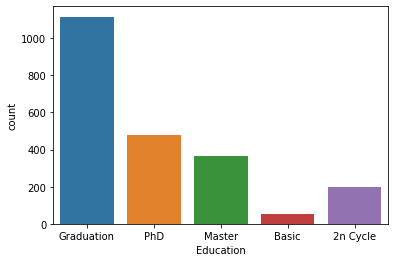

In [10]:
sns.countplot(x='Education', data=df)

### No outliers in education ###

<AxesSubplot:xlabel='Marital_Status', ylabel='count'>

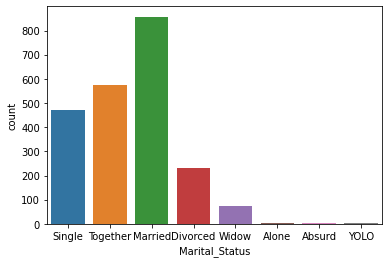

In [11]:
sns.countplot(x='Marital_Status', data=df)

### There are some useless responses that we can remove such as 'Absurd' and 'YOLO'. We can change the 'Alone' responses to Single. ###

In [12]:
# Long winded way of checking for number of 'Alone' responses instead of using value_counts function
needs_changing = ['Alone']

# Checking how many need changing
df['Marital_Status'].isin(needs_changing).sum()

3

In [13]:
# Replacing Alone with Single
df['Marital_Status'].replace('Alone', 'Single', inplace=True)

In [14]:
# Checking to see that it worked
df['Marital_Status'].isin(needs_changing).sum()

0

In [15]:
# Just curious to see the full records of the crazy marital status responses
df.loc[((df['Marital_Status'] == 'YOLO') | (df['Marital_Status'] == 'Absurd'))]

,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,...,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response
2093,1993,Graduation,Absurd,79244.0,0,0,19-12-2012,58,471,102,...,10,7,1,0,0,1,1,0,0,1
2134,1957,Master,Absurd,65487.0,0,0,10-01-2014,48,240,67,...,5,6,2,0,0,0,0,0,0,0
2177,1973,PhD,YOLO,48432.0,0,1,18-10-2012,3,322,3,...,1,6,8,0,0,0,0,0,0,0
2202,1973,PhD,YOLO,48432.0,0,1,18-10-2012,3,322,3,...,1,6,8,0,0,0,0,0,0,1


### Two entries appear to be duplicates we need to remove ###

In [16]:
# Grabbing the rows that contain outlier responses
redic_index = df.loc[((df['Marital_Status'] == 'YOLO') | (df['Marital_Status'] == 'Absurd'))].index

redic_index

Int64Index([2093, 2134, 2177, 2202], dtype='int64')

In [17]:
# Removing the rediculous entries
df.drop(index=redic_index, inplace=True)

In [18]:
# Change Year_Birth to an actual age
df['Age'] = 2022 - df['Year_Birth']

<AxesSubplot:xlabel='Age', ylabel='Count'>

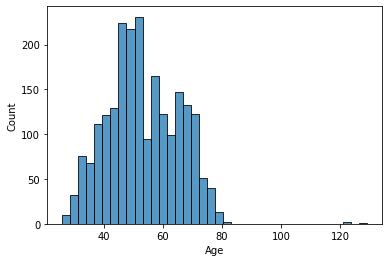

In [19]:
sns.histplot(df, x='Age')

### There are some age outliers we should remove. ###

In [20]:
# Let's see who the age outliers are
df.sort_values(by='Age', ascending=False)

,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,...,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response,Age
239,1893,2n Cycle,Single,60182.0,0,1,17-05-2014,23,8,0,...,2,4,0,0,0,0,0,0,0,129
339,1899,PhD,Together,83532.0,0,0,26-09-2013,36,755,144,...,4,1,0,0,1,0,0,0,0,123
192,1900,2n Cycle,Divorced,36640.0,1,0,26-09-2013,99,15,6,...,2,5,0,0,0,0,0,1,0,122
1950,1940,PhD,Single,51141.0,0,0,08-07-2013,96,144,0,...,4,5,0,0,0,0,0,0,0,82
424,1941,PhD,Married,93027.0,0,0,13-04-2013,77,1285,42,...,5,2,0,0,1,0,0,0,0,81
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1850,1995,2n Cycle,Single,83257.0,0,0,18-09-2012,56,536,27,...,12,6,1,0,1,0,0,1,1,27
995,1995,Graduation,Single,34824.0,0,0,26-03-2014,65,4,2,...,2,6,0,0,0,0,0,0,0,27
2213,1995,2n Cycle,Single,80617.0,0,0,12-10-2012,42,594,51,...,8,2,0,0,0,0,0,0,0,27
46,1996,2n Cycle,Married,7500.0,0,0,09-11-2012,24,3,18,...,3,9,0,0,0,0,0,0,1,26


In [21]:
# Grabbing the rows that contain outlier ages
redic_ages = df.loc[df['Age'] > 100].index

redic_ages

Int64Index([192, 239, 339], dtype='int64')

In [22]:
# Dropping these records
df.drop(index=redic_ages, inplace=True)

In [23]:
df.shape

(2209, 27)

In [24]:
# Let's remove the duplicate records mentioned earlier
df = df.drop_duplicates()

### Exploring how many of our customers have children and how many at home. ###

In [25]:
# Calculating the total number of children and teens at home
df['Kidspresent'] = df['Kidhome'] + df['Teenhome']

In [26]:
df['Kidspresent'].max()

3

### No more than 3 children present in any customer household. ###

In [27]:
# I noticed earlier that there were some older customers with children or teens at home. Lets see who they are
older_caretakers = df.loc[((df['Age'] >= 60) & (df['Kidspresent'] > 0))]

In [28]:
older_caretakers.sort_values(by='Age', ascending=False)

,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response,Age,Kidspresent
514,1946,PhD,Together,44124.0,0,1,11-05-2013,62,284,0,...,8,0,0,0,0,0,0,0,76,1
1487,1946,PhD,Together,64014.0,2,1,10-06-2014,56,406,0,...,7,0,0,0,1,0,0,0,76,3
2030,1947,PhD,Widow,68117.0,0,1,10-03-2013,80,618,44,...,6,1,0,0,0,0,0,1,75,1
1654,1947,PhD,Widow,25358.0,0,1,22-07-2013,57,19,0,...,6,0,0,0,0,0,0,0,75,1
1931,1947,PhD,Married,67472.0,0,1,28-09-2013,93,162,31,...,3,0,0,0,0,0,0,0,75,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1315,1962,PhD,Single,27238.0,1,1,20-04-2013,39,37,0,...,9,0,0,0,0,0,0,0,60,2
1556,1962,Master,Together,47175.0,1,1,28-10-2012,81,167,2,...,8,1,0,0,0,0,0,1,60,2
671,1962,Master,Single,59247.0,0,2,08-11-2013,87,327,9,...,6,0,0,0,0,0,0,0,60,2
533,1962,Graduation,Married,65316.0,1,1,24-04-2013,65,112,6,...,4,0,0,0,0,0,0,0,60,2


### There are some elderly people with children at home. However, I wonder if this could mean that they are living with their children, who are caretakers, and also have children of their own at home. ###

### They all appear to be well educated for the most part with a lot of PhD's. ###

In [29]:
# Distribution of children by age of parent
Num_Kids_by_Parent_Age = df['Kidspresent'].groupby(df['Age']).sum()

Num_Kids_by_Parent_Age

Age
26     0
27     0
28     0
29     0
30     4
31     1
32     6
33    17
34    16
35     9
36    25
37    23
38    29
39    18
40    21
41    34
42    34
43    47
44    73
45    53
46    87
47    83
48    63
49    76
50    81
51    86
52    70
53    63
54    65
55    54
56    50
57    66
58    41
59    46
60    41
61    30
62    43
63    43
64    49
65    36
66    58
67    42
68    41
69    38
70    52
71    38
72    34
73    23
74    13
75     4
76     4
77     0
78     0
79     0
81     0
82     0
Name: Kidspresent, dtype: int64

<AxesSubplot:xlabel='Kidspresent', ylabel='count'>

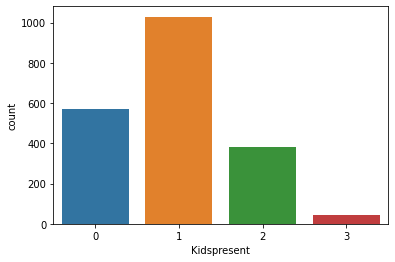

In [30]:
sns.countplot(data=df, x='Kidspresent')

### Most customers only have a single child or teen at home. ###

In [31]:
# Checking the total amount spent by shopping category
spend_by_cat = pd.DataFrame(df[['MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds']].sum()).reset_index()


# Renaming columns which default to index and 0 from dataframe
spend_by_cat.rename(columns={'index':'Category', 0:'Spend'}, inplace=True)


# Sorting spend in descensing order
spend_by_cat.sort_values('Spend', ascending=False)

,Category,Spend
0,MntWines,618600
2,MntMeatProducts,339907
5,MntGoldProds,88346
3,MntFishProducts,75616
4,MntSweetProducts,55056
1,MntFruits,53147


<AxesSubplot:xlabel='Category', ylabel='Spend'>

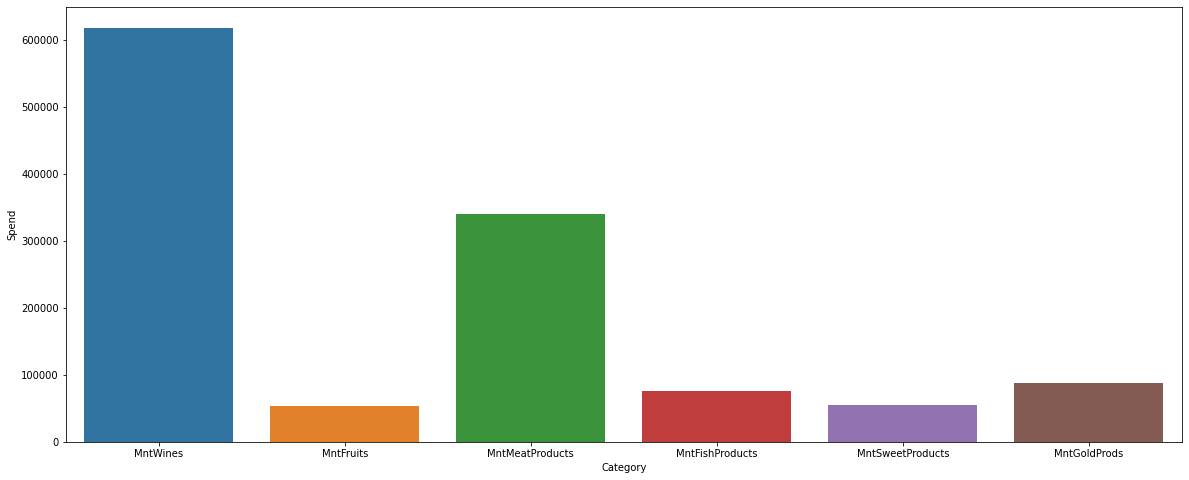

In [32]:
plt.figure(figsize=(20,8))

sns.barplot(x='Category', y='Spend', data=spend_by_cat)

### One thing that is not taken into account in this visualization is the cost per item in each product category. A bottle of wine is more expensive than a given single item of fruit. ###

Could check to see if this info is available online and could factor it into the data.

In [33]:
# Checking the total number of purchases by category
type_of_purchase = pd.DataFrame(df[['NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases']].sum())

type_of_purchase = type_of_purchase.reset_index()

# Renaming original index column
type_of_purchase.rename(columns={'index':'Category', 0:'Total_Purchases'}, inplace=True)

type_of_purchase

,Category,Total_Purchases
0,NumWebPurchases,8307
1,NumCatalogPurchases,5408
2,NumStorePurchases,11724


<AxesSubplot:xlabel='Category', ylabel='Total_Purchases'>

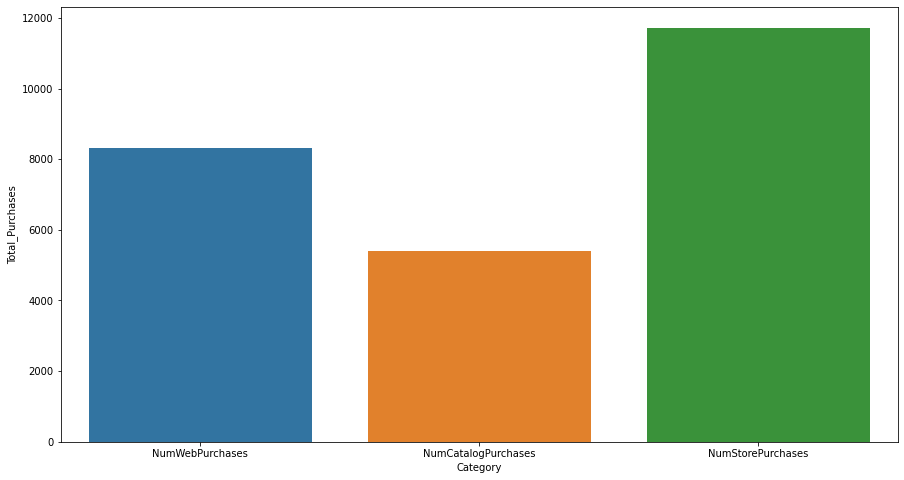

In [34]:
plt.figure(figsize=(15,8))

sns.barplot(x='Category', y='Total_Purchases', data=type_of_purchase)

### Most purchases happen in-store. However there are a surpsiging number of catalog purchases. ###

In [35]:
# convert dt_customer column to pandas datetime object
df['Dt_Customer'] = pd.to_datetime(df['Dt_Customer'])

In [36]:
# create a list of the spend categories and calculating a total spend column
spend_categories = ['MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds']

df['total_spend'] = df[spend_categories].sum(axis=1)

In [37]:
df['total_spend']

0       1617
1         27
2        776
3         53
4        422
        ... 
2233      62
2235    1341
2237    1241
2238     843
2239     172
Name: total_spend, Length: 2026, dtype: int64

In [38]:
# checking the numbers
df[['MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds', 'total_spend']]

,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,total_spend
0,635,88,546,172,88,88,1617
1,11,1,6,2,1,6,27
2,426,49,127,111,21,42,776
3,11,4,20,10,3,5,53
4,173,43,118,46,27,15,422
...,...,...,...,...,...,...,...
2233,9,14,18,8,1,12,62
2235,709,43,182,42,118,247,1341
2237,908,48,217,32,12,24,1241
2238,428,30,214,80,30,61,843


<AxesSubplot:xlabel='Dt_Customer', ylabel='total_spend'>

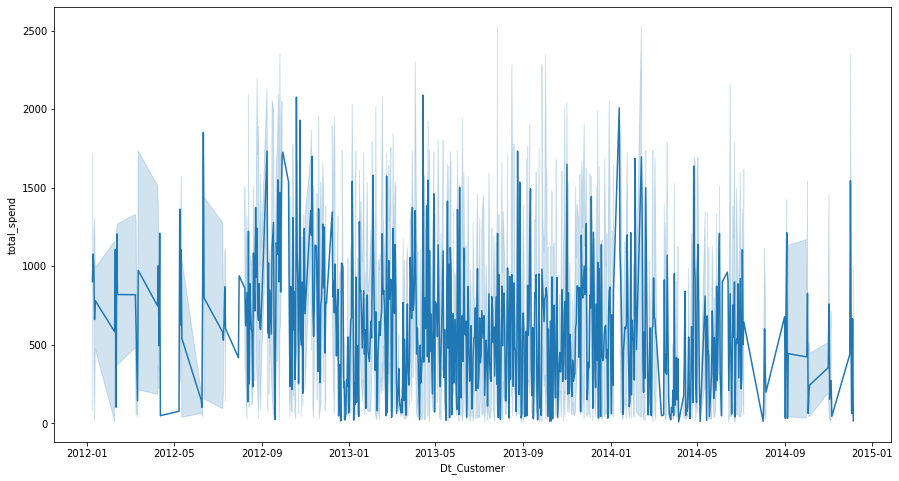

In [39]:
# Graphing dt_customer and total spend to see if there is a relationship
plt.figure(figsize=(15,8))

sns.lineplot(x='Dt_Customer', y='total_spend', data=df)

### Apparent positive relationship between the length of a time as a customer and the amount spent ###

Something else is the frequency of signups between 2012 and mid-2014 compared to earlier and later dates. Nothing we'll be able to answer with the data we have. Maybe tied to more frequent promotional offers or more marketing during that period.

In [40]:
# Grouping ages into 4 groups
df['AgeGroup'] = pd.cut(df['Age'], bins=4, labels=['Young Adult', 'Adult', 'Middle Adult', 'Senior'])

df['AgeGroup']

0       Middle Adult
1       Middle Adult
2       Middle Adult
3        Young Adult
4              Adult
            ...     
2233           Adult
2235    Middle Adult
2237           Adult
2238    Middle Adult
2239    Middle Adult
Name: AgeGroup, Length: 2026, dtype: category
Categories (4, object): ['Young Adult' < 'Adult' < 'Middle Adult' < 'Senior']

<AxesSubplot:xlabel='AgeGroup', ylabel='total_spend'>

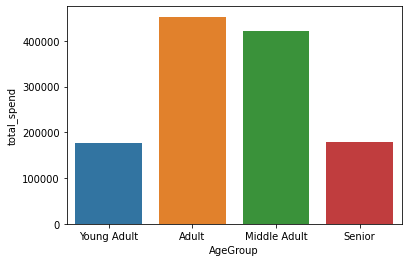

In [41]:
# Graphing the total spend by age group
spend_by_age_group_df = df[['AgeGroup', 'total_spend']].groupby(by='AgeGroup').sum().reset_index()

sns.barplot(x='AgeGroup', y='total_spend', data=spend_by_age_group_df)

In [42]:
pd.cut(df['Age'], bins=4).unique()

[(54.0, 68.0], (25.944, 40.0], (40.0, 54.0], (68.0, 82.0]]
Categories (4, interval[float64, right]): [(25.944, 40.0] < (40.0, 54.0] < (54.0, 68.0] < (68.0, 82.0]]

### For reference, the age ranges for the groups are: ###

 - 25-39 
 - 40-53
 - 54-67
 - 68-82

In [43]:
df['AgeGroup'].value_counts()

Adult           861
Middle Adult    617
Young Adult     306
Senior          242
Name: AgeGroup, dtype: int64

### The value counts of each age group mirrors the spend by age group so maybe nothing special with spend there. ###

In [44]:
df.columns

Index(['Year_Birth', 'Education', 'Marital_Status', 'Income', 'Kidhome',
       'Teenhome', 'Dt_Customer', 'Recency', 'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Complain', 'Response', 'Age', 'Kidspresent',
       'total_spend', 'AgeGroup'],
      dtype='object')

In [45]:
num_cols = ['Income', 'MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 
           'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases',
           'NumWebVisitsMonth', 'Age', 'Kidspresent', 'total_spend']

In [46]:
df[num_cols]

,Income,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Age,Kidspresent,total_spend
0,58138.0,635,88,546,172,88,88,3,8,10,4,7,65,0,1617
1,46344.0,11,1,6,2,1,6,2,1,1,2,5,68,2,27
2,71613.0,426,49,127,111,21,42,1,8,2,10,4,57,0,776
3,26646.0,11,4,20,10,3,5,2,2,0,4,6,38,1,53
4,58293.0,173,43,118,46,27,15,5,5,3,6,5,41,1,422
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2233,666666.0,9,14,18,8,1,12,4,3,1,3,6,45,1,62
2235,61223.0,709,43,182,42,118,247,2,9,3,4,5,55,1,1341
2237,56981.0,908,48,217,32,12,24,1,2,3,13,6,41,0,1241
2238,69245.0,428,30,214,80,30,61,2,6,5,10,3,66,1,843


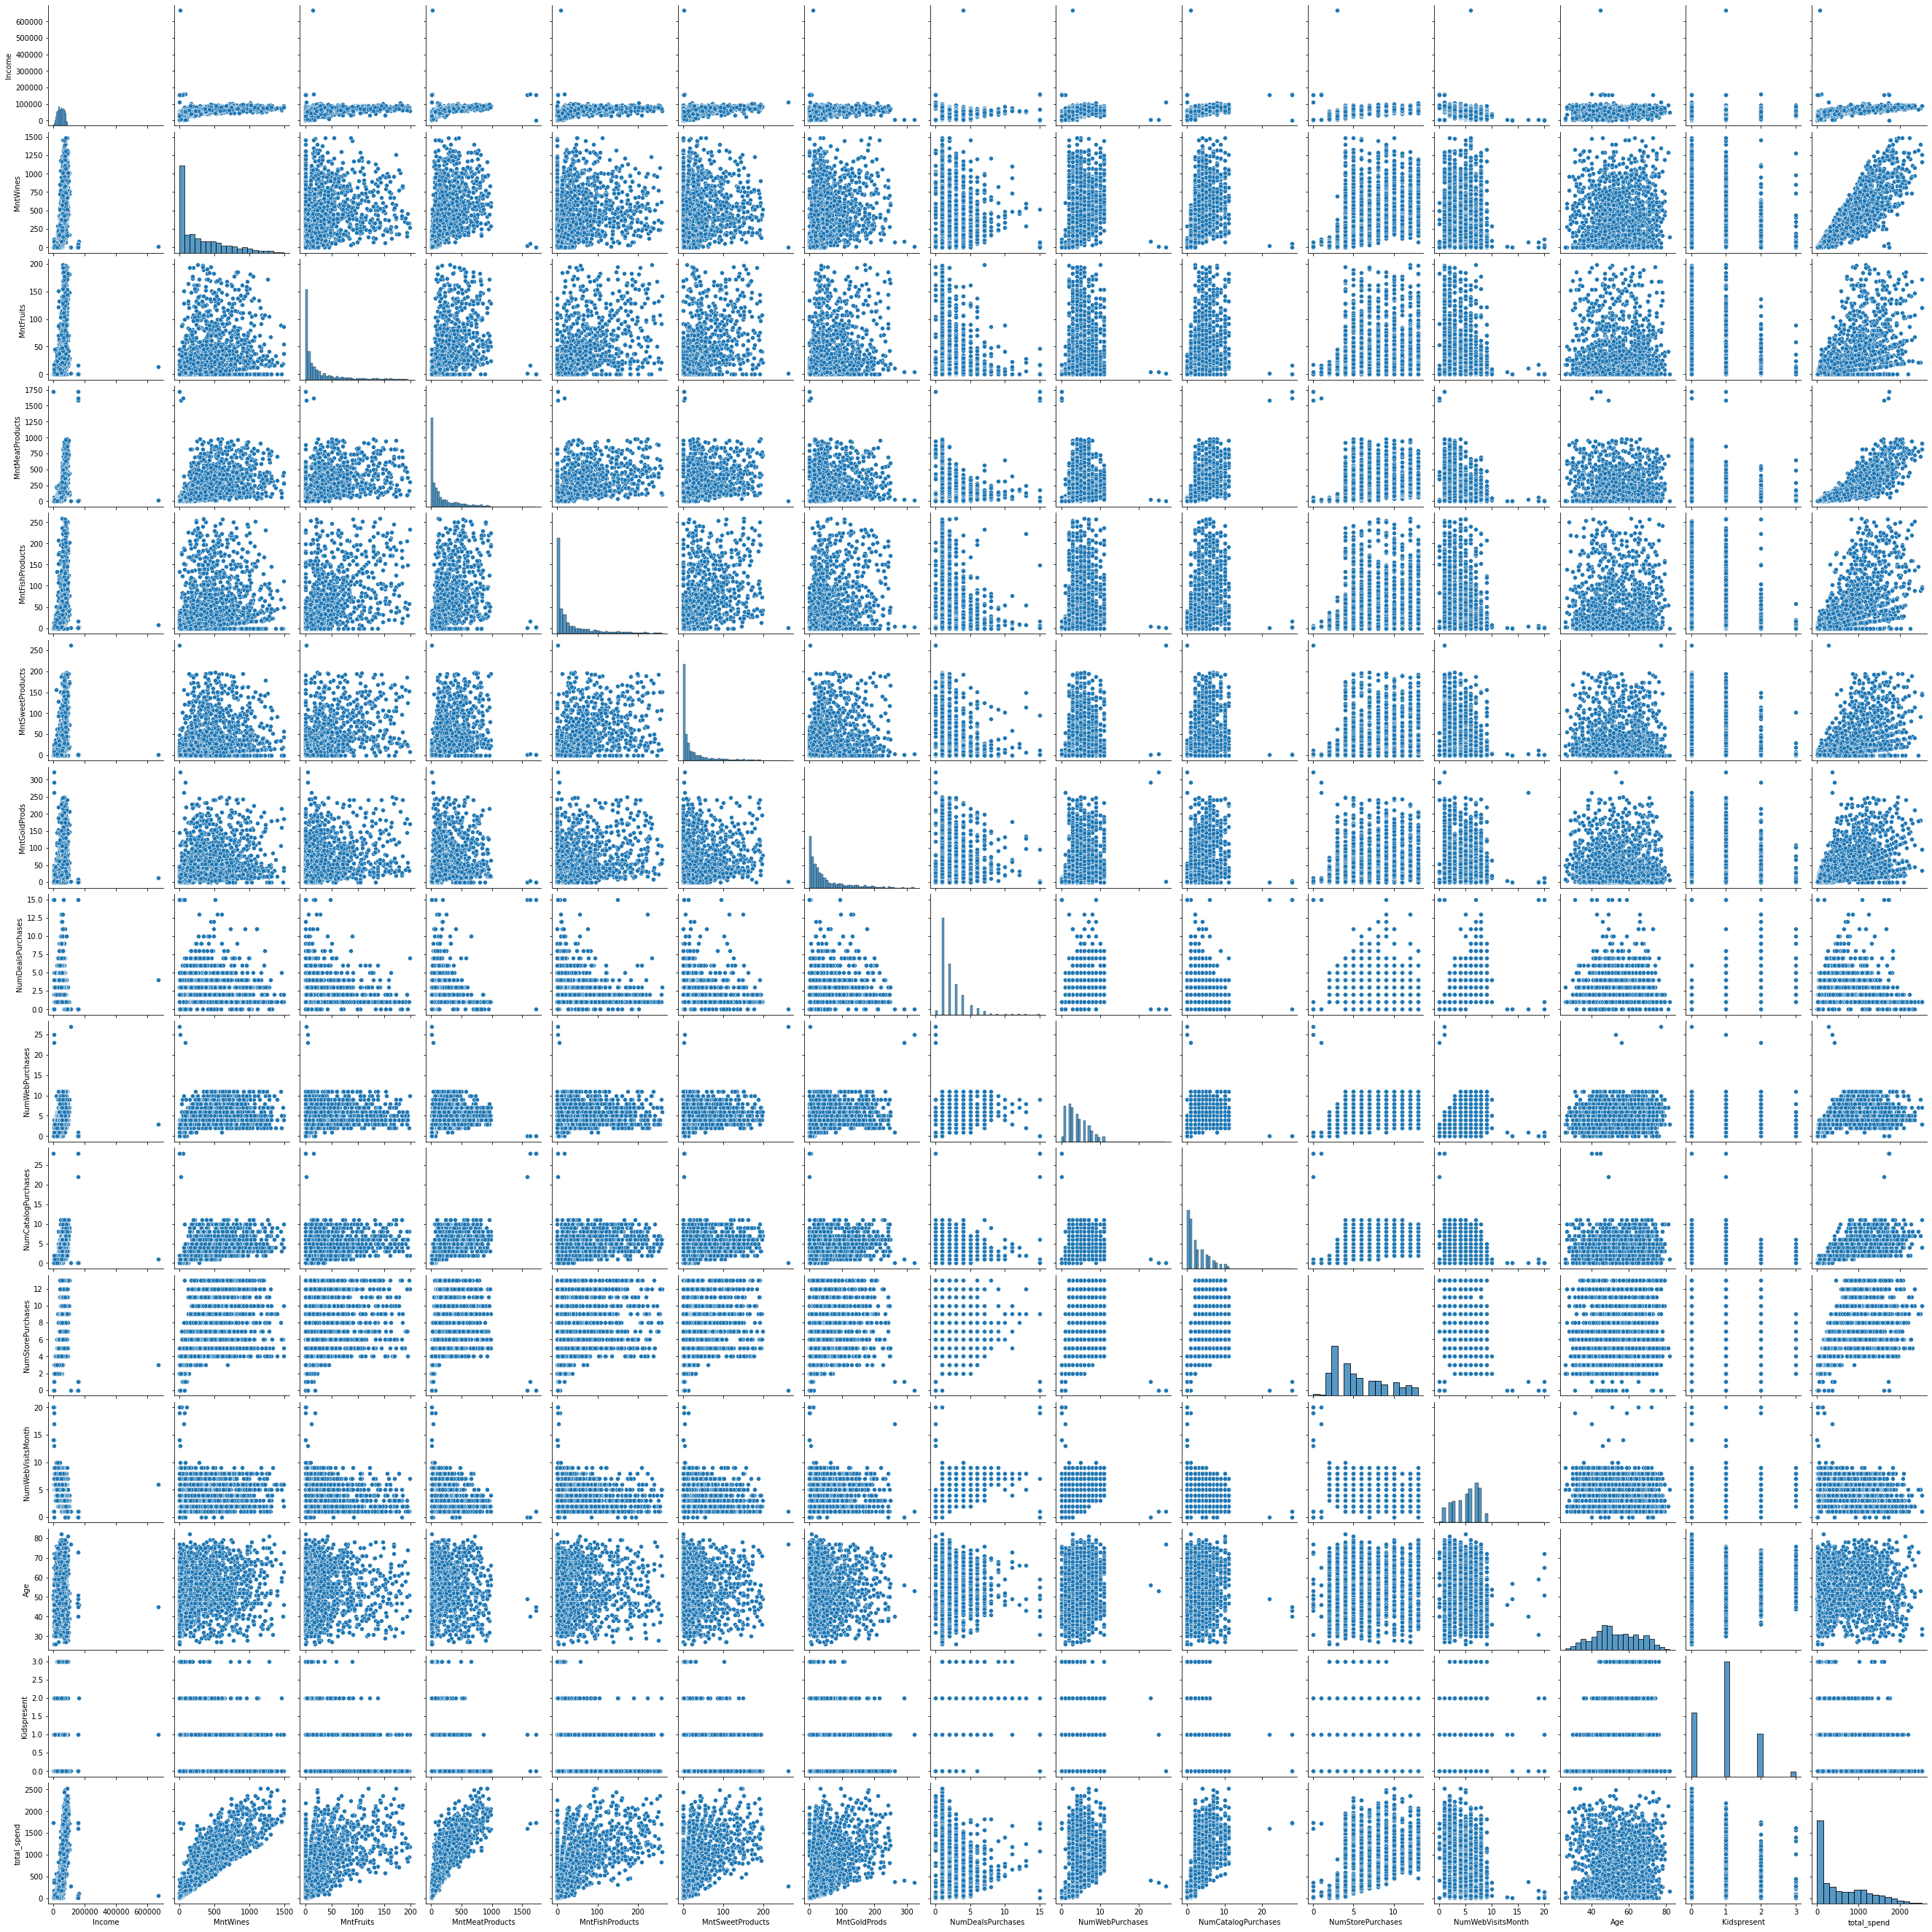

In [49]:
sns.pairplot(data=df[num_cols])

In [47]:
from sklearn.decomposition import PCA

In [53]:
from sklearn.cluster import KMeans

In [56]:
# Performing KMeans clustering on the data

# Performing elbow method
distortions = []

K = range(1,10)

for k in K:
    kmeanModel = KMeans(n_clusters=k)
    kmeanModel.fit(df[num_cols])
    distortions.append(kmeanModel.inertia_)

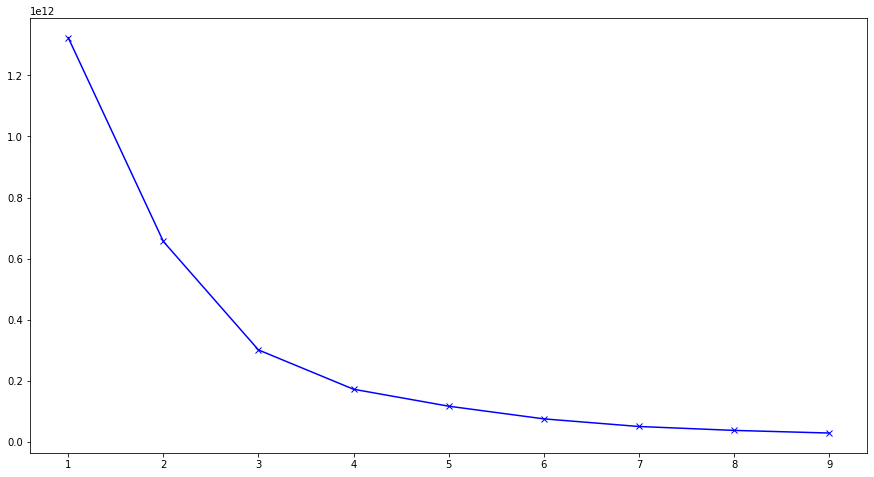

In [57]:
# Plotting the distortions
plt.figure(figsize=(15,8))
plt.plot(K, distortions, 'bx-')
plt.show()

Looks like 4 will be a good number of clusters to use

In [49]:
# Create the model to reduce data to 2 dimensions
pca = PCA(n_components=2)
pca.fit(df[num_cols])

PCA(n_components=2)

In [51]:
# Create new object for transformed data
transformed_data = pca.transform(df[num_cols])

In [58]:
transformed_df = pd.DataFrame(transformed_data, columns=['PCA1', 'PCA2'])

transformed_df.head()

,PCA1,PCA2
0,5817.861152,-1011.216018
1,-6006.496822,565.705544
2,19273.871316,153.235951
3,-25700.848607,186.940107
4,5948.543071,337.440231


In [59]:
kmeanModel = KMeans(n_clusters=4)
kmeanModel.fit(transformed_df)

KMeans(n_clusters=4)

In [60]:
transformed_df['kmeans'] = kmeanModel.predict(transformed_df)

transformed_df.head()

,PCA1,PCA2,kmeans
0,5817.861152,-1011.216018,3
1,-6006.496822,565.705544,3
2,19273.871316,153.235951,1
3,-25700.848607,186.940107,0
4,5948.543071,337.440231,3
